In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
from datetime import datetime
from model import *

In [2]:
df = pd.read_csv("boston_kaggle/rideshare_kaggle.csv")

In [3]:
old_df = df.copy()

In [4]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
df = df[['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'distance', 'price']]
df['time_stamp'] = df['timestamp']+ 5*60*60
df = df.sort_values(by = "time_stamp")
#make assumption that drivers are driving at 40 mph - get duration in seconds
df['duration'] = df['distance'] / 10 * 60 * 60
df = df.reset_index(drop=True)
df = df.fillna(0)

In [6]:
set(df.destination)

{'Back Bay',
 'Beacon Hill',
 'Boston University',
 'Fenway',
 'Financial District',
 'Haymarket Square',
 'North End',
 'North Station',
 'Northeastern University',
 'South Station',
 'Theatre District',
 'West End'}

In [7]:
df.head(2000)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,distance,price,time_stamp,duration
0,90e22612-d1c7-47c2-af54-2a2240109889,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Beacon Hill,North End,2.19,17.5,1.543222e+09,788.4
1,3b5af7f6-40ba-42f2-a218-971dcba4f33e,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Financial District,4.46,47.5,1.543222e+09,1605.6
2,6172077a-22de-481b-aae2-b5763c87a6c4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,Fenway,2.71,32.0,1.543222e+09,975.6
3,edfc7f44-97e1-48cd-930c-e4fe20e88ac8,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Northeastern University,Beacon Hill,2.43,10.5,1.543222e+09,874.8
4,2ee597c2-b685-450e-b3a2-2df42fb18d49,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,Fenway,2.71,0.0,1.543222e+09,975.6
5,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,Fenway,2.71,19.5,1.543222e+09,975.6
6,63fbb593-95ba-4b74-88d1-e3eb0d99fe33,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Haymarket Square,Theatre District,1.16,0.0,1.543222e+09,417.6
7,1178f52c-9bd4-4b28-a03a-d94e68bfafa3,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Financial District,4.46,62.5,1.543222e+09,1605.6
8,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,1.57,0.0,1.543222e+09,565.2
9,d3d168df-a1b6-4de3-b1a1-7d1fb464bd41,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Beacon Hill,Boston University,2.30,9.0,1.543222e+09,828.0


In [8]:
def simulate_drive(drive_df, time_start, time_end, source = "Beacon Hill", verbose = True):
    wait_noise = max(0, np.random.normal(0, 1) * 60 * 2 + 5 * 60)
    time_start = time_start + wait_noise
    
    #total price of all the rides
    running_price = 0
    
    #duration of the ride
    duration = 0
    
    drive_df = drive_df[(drive_df['time_stamp'] > time_start) & (drive_df['time_stamp'] < time_end)]
    drives = drive_df[(drive_df['time_stamp'] > time_start) & (drive_df['source'] == source)].reset_index(drop= True)

    wait_noise = 0
    
    while(len(drives) > 0): 
        wait_noise = max(0, np.random.normal(0, 1) * 60 * 2 + 5 * 60)
        if verbose: 
            print("\t[Time_Start : %s] $%s [%.2f (%.2f wait)] [%s] to [%s]" %(str(datetime.fromtimestamp(time_start)).split(".")[0],
                                                        drives['price'].iloc[0],
                                                        drives['duration'].iloc[0]/60,
                                                        wait_noise/60, 
                                                        drives['source'].iloc[0], 
                                                        drives['destination'].iloc[0] 
                                                        ))
        running_price += drives['price'].iloc[0]
        duration = drives['duration'].iloc[0] 

        
        #note - everything below is after the trip has been taken already

        
        #increment time start by the duration of the trip + the noise in waiting for the next trip
        time_start = time_start + duration + wait_noise

        # the next source is the current drive's destination
        source = drives['destination'].iloc[0]
        # drives is based on a slice of the dataframe
        drives = drive_df[(drive_df['time_stamp'] > time_start) & (drive_df['source'] == source)].reset_index(drop= True)

    if verbose: 
        print("\tPrice $%.2f" % running_price)
        print("\tEarned $%.2f" % (running_price * 0.3))
    earnings = running_price * 0.3
    return np.round(running_price, 2), np.round(earnings, 2)

time_start = df['time_stamp'].iloc[100]

print(df.iloc[1]['source'])
time_end = time_start + 60 * 60 

print(time_start)
print(time_end)
simulate_drive(df.copy(), time_start, time_end, source = df.iloc[1]['source'])


Boston University
1543225256.0
1543228856.0
	[Time_Start : 2018-11-26 04:43:00] $7.0 [9.36 (3.95 wait)] [Boston University] to [Back Bay]
	[Time_Start : 2018-11-26 04:56:19] $10.5 [6.48 (6.18 wait)] [Back Bay] to [Northeastern University]
	[Time_Start : 2018-11-26 05:08:58] $5.0 [14.70 (8.90 wait)] [Northeastern University] to [Beacon Hill]
	[Time_Start : 2018-11-26 05:32:34] $9.0 [14.58 (5.79 wait)] [Beacon Hill] to [Boston University]
	Price $31.50
	Earned $9.45


(31.5, 9.45)

NameError: name 'to_datestring' is not defined

In [10]:
set(df.datetime)

{'2018-12-13 06:15:03',
 '2018-12-17 21:25:13',
 '2018-12-03 18:57:59',
 '2018-12-15 16:40:09',
 '2018-12-01 19:37:59',
 '2018-11-26 15:02:10',
 '2018-11-30 06:23:03',
 '2018-12-18 00:25:12',
 '2018-11-30 11:53:02',
 '2018-12-17 11:25:07',
 '2018-12-16 10:20:03',
 '2018-11-28 14:38:08',
 '2018-12-15 09:00:05',
 '2018-12-13 10:20:10',
 '2018-11-27 18:45:22',
 '2018-12-14 22:10:03',
 '2018-12-17 01:10:07',
 '2018-12-16 22:30:11',
 '2018-12-04 01:42:57',
 '2018-12-16 20:15:04',
 '2018-12-02 17:32:55',
 '2018-12-17 21:05:04',
 '2018-11-28 00:27:23',
 '2018-12-03 09:57:55',
 '2018-12-13 22:05:05',
 '2018-12-16 08:40:10',
 '2018-11-29 06:28:03',
 '2018-12-03 17:22:56',
 '2018-12-15 00:45:05',
 '2018-12-15 23:20:05',
 '2018-12-14 02:35:12',
 '2018-12-13 20:40:14',
 '2018-11-30 23:48:06',
 '2018-12-18 09:40:10',
 '2018-12-13 03:40:05',
 '2018-11-30 23:57:57',
 '2018-12-13 15:00:05',
 '2018-12-17 06:00:08',
 '2018-11-28 22:50:07',
 '2018-11-29 14:23:05',
 '2018-12-17 23:45:12',
 '2018-12-03 04:

In [11]:
CALENDAR_SIZE = (24, 7) #set calendar size to 24 by 7 

def generate_calendar_matrix(arr = None): 
    '''
    Generates a calendar matrix based off
    an optional numpy input array. If no arr
    is inputted, the default is zero
    '''
    if arr is None:
        arr = np.zeros(CALENDAR_SIZE)
    df = pd.DataFrame(arr, index = range(CALENDAR_SIZE[0]), columns= ["mon", "tues", "wed", "thur", "fri", "sat", "sun"])
    return df

def to_datestring(s): 
    return str(datetime.fromtimestamp(s)).split(".")[0]

In [12]:
to_datestring(1543284023.67)

'2018-11-26 21:00:23'

In [13]:
cdf = (np.random.random(CALENDAR_SIZE) > 0.75).astype(int)


def get_start_end_times(cmatrix, base_date = '11/26/18'): 
    orig = np.zeros((CALENDAR_SIZE[0] + 1, CALENDAR_SIZE[1]))
    shift = np.zeros((CALENDAR_SIZE[0] + 1, CALENDAR_SIZE[1]))

    orig[1:, :] = cmatrix
    shift[:-1, :] = cmatrix

    diff = shift - orig

    start_times_bool = diff == 1
    end_times_bool = diff == -1
    
    base_timestamp = datetime.timestamp(datetime.strptime((base_date), '%m/%d/%y'))
    li = [[base_timestamp + hour*60*60 + day*24*60*60 for day in range(7)] for hour in range(25)]
    #li = [[str(datetime.fromtimestamp(x)).split(".")[0] for x in y] for y in li]

    date_arr = np.array(li)

    start_times = date_arr[start_times_bool]
    end_times = date_arr[end_times_bool]

    start_times = np.sort(start_times)
    end_times = np.sort(end_times)
    
    return start_times, end_times


start_times, end_times = get_start_end_times(cdf)
print(cdf)
print(start_times, end_times)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1]
 [0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 1 1 0 0]
 [1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 1 1 0 1 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 1 1 1]
 [0 0 0 1 0 0 1]
 [1 0 0 0 0 0 1]
 [0 1 0 1 0 0 0]]
[1.5432516e+09 1.5432732e+09 1.5432804e+09 1.5432876e+09 1.5432948e+09
 1.5433128e+09 1.5433200e+09 1.5433344e+09 1.5433488e+09 1.5433560e+09
 1.5433776e+09 1.5433848e+09 1.5433920e+09 1.5434136e+09 1.5434244e+09
 1.5434316e+09 1.5434460e+09 1.5434892e+09 1.5434964e+09 1.5435036e+09
 1.5435324e+09 1.5435432e+09 1.5435504e+09 1.5435936e+09 1.5436260e+09
 1.5436512e+09 1.5436584e+09 1.5436836e+09 1.5437052e+09 1.5437124e+09
 1.5437376e+09 1.5437988e+09] [1.5432552e+09 1.5432768e+09 1.5432840e+09 1.5432912e+09 1.5432984e+09
 1.5433164e+09 1.5433236e+09 1.5433380e+09 1.5433524e+09 1.54335

In [14]:
plt.imshow(cmatrix)

NameError: name 'cmatrix' is not defined

In [15]:
def schedule_model(cmatrix, trials = 1, verbose = True): 
    start_times, end_times = get_start_end_times(cmatrix)
    
    earningslist = []
    for i in range(trials): 
        running_price = 0
        running_earnings = 0
        for i in range(len(start_times)): 
            start = start_times[i]
            end = end_times[i]
            if verbose: 
                print("Ride %d of %d [%d%%] \tStart: %s \tEnd: %s"%(i, len(start_times), 100 * i/len(start_times), to_datestring(start), to_datestring(end)))
            price, earnings = simulate_drive(df, start, end, verbose = verbose)
            running_price += price
            running_earnings += earnings
        
        running_earnings = np.round(running_earnings, 2)
        earningslist.append(running_earnings)
    return earningslist

schedule_model(cmatrix)

NameError: name 'cmatrix' is not defined

In [38]:
#set availability
mask = np.zeros(CALENDAR_SIZE)
mask[7:23, :] = 1
mask = mask.astype(int)


dates = ["2018-11-26", "2018-11-27", "2018-11-28", "2018-11-29", "2018-11-30", "2018-12-01", "2018-12-02"]

trials = 100
trial_earnings_recs = []
#generate recommendation-based-earnings
for i in range(trials):
    hours = np.random.normal(20, 3)
    traffic_preference = np.random.normal(1, 0.5)
    weights = {'traffic': traffic_preference}
    if i%100 == 0: 
        print("%d of %d [%d%%]"%(i, trials, 100*i/trials)) 
    cmatrix = simple_model(weights, mask, hours, CALENDAR_SIZE, dates, verbose = False)
    
    trial_earnings_recs.append(np.mean(schedule_model(cmatrix, verbose = False)))

trial_earnings_rand = []
#generate recommendation-based-earnings    
for i in range(trials): 
    hours = np.random.normal(20, 3)
    cdf = (np.random.random(CALENDAR_SIZE))
    cdf = (cdf * mask)
    if i%100 == 0: 
        print("%d of %d [%d%%]"%(i, trials, 100*i/trials)) 
    cmatrix = (cdf > np.quantile(cdf, (24*7 - hours)/(24*7))).astype(int)
    trial_earnings_rand.append(np.mean(schedule_model(cmatrix, verbose = False)))
    
print(['Done'])

0 of 100 [0%]
0 of 100 [0%]
['Done']


In [24]:
with open("recs.txt", "x") as f: 
    f.write(str(trial_earnings_recs))
with open("rand.txt", "x") as f: 
    f.write(str(trial_earnings_rand))

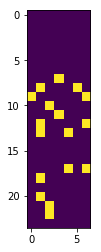

In [18]:
hours = np.random.normal(20, 3)
cdf = (np.random.random(CALENDAR_SIZE))
cdf = (cdf * mask)
cmatrix = (cdf > np.quantile(cdf, (24*7 - hours)/(24*7))).astype(int)
plt.imshow(cmatrix)

In [19]:
cdf = generate_calendar_matrix((np.random.random(CALENDAR_SIZE) > 0.75).astype(int))

In [20]:
np.random.normal(1, 0.5)

1.27867881215438

In [40]:
from scipy.stats import ttest_ind
ttest_ind(np.array(trial_earnings_recs), np.array(trial_earnings_rand))

Ttest_indResult(statistic=3.082674875592922, pvalue=0.002343962753683669)

In [39]:
np.mean(np.array(trial_earnings_recs)) - np.mean(np.array(trial_earnings_rand))

23.812500000000114

In [28]:
np.mean(np.array(trial_earnings_recs)) 

335.36775

In [29]:
np.mean(np.array(trial_earnings_rand))

318.7929

In [30]:
recs = trial_earnings_recs
rand = trial_earnings_rand

In [34]:
np.mean(recs) - np.mean(rand)

16.574850000000026